In [105]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report ,f1_score
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.pipeline import make_pipeline

In [106]:
df = pd.read_csv("BANKRUPTCY PREDICTION .csv")
df.head()

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability,Bankrupt
0,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,0.016469,1
1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,0.020794,1
2,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,0.780284,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,0.016474,1
3,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,0.781241,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,0.023982,1
4,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,0.781550,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,0.035490,1


In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 95 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 1    ROA(A) before interest and % after tax                   6819 non-null   float64
 2    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 3    Operating Gross Margin                                   6819 non-null   float64
 4    Realized Sales Gross Margin                              6819 non-null   float64
 5    Operating Profit Rate                                    6819 non-null   float64
 6    Pre-tax net Interest Rate                                6819 non-null   float64
 7    After-tax net Interest Rate                              6819 non-null   float64
 8    Non-industry inco

In [108]:
df.isnull().sum()

 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
 Realized Sales Gross Margin                                0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Equity to Liability                                        0
Bankrupt                                                    0
Length: 95, dtype: int64

In [109]:
df.isnull().sum().sum()

0

In [110]:
df["Bankrupt"].value_counts()

0    6599
1     220
Name: Bankrupt, dtype: int64

<AxesSubplot:>

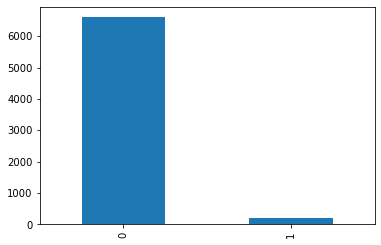

In [111]:
df["Bankrupt"].value_counts().plot(kind="bar")

In [112]:
#data is imbalance so we need to balance it.

In [113]:
df.shape

(6819, 95)

In [114]:
#Data Visulaization

<AxesSubplot:xlabel=' Liability-Assets Flag', ylabel='count'>

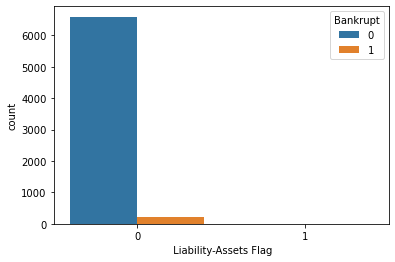

In [115]:
sns.countplot(x =' Liability-Assets Flag',hue = 'Bankrupt',data = df)

 A small portion of organizations suffers bankruptcy, although possessing more assets than their liabilities.

In [116]:
df1 = df.loc[:, df.columns != "Bankrupt"]
features=df1.columns

In [117]:
positive_corr = df[features].corrwith(df["Bankrupt"]).sort_values(ascending=False)[:6].index.tolist()
negative_corr = df[features].corrwith(df["Bankrupt"]).sort_values()[:6].index.tolist()

positive_corr = df[positive_corr + ["Bankrupt"]].copy()
negative_corr = df[negative_corr + ["Bankrupt"]].copy()




In [118]:
def corrbargraph(x_value, y_value):
    
    plt.figure(figsize=(15,8))

    for i in range(1,7):
        plt.subplot(2,3,i)  
        sns.barplot(x = x_value, y = y_value[i-1],data = df)

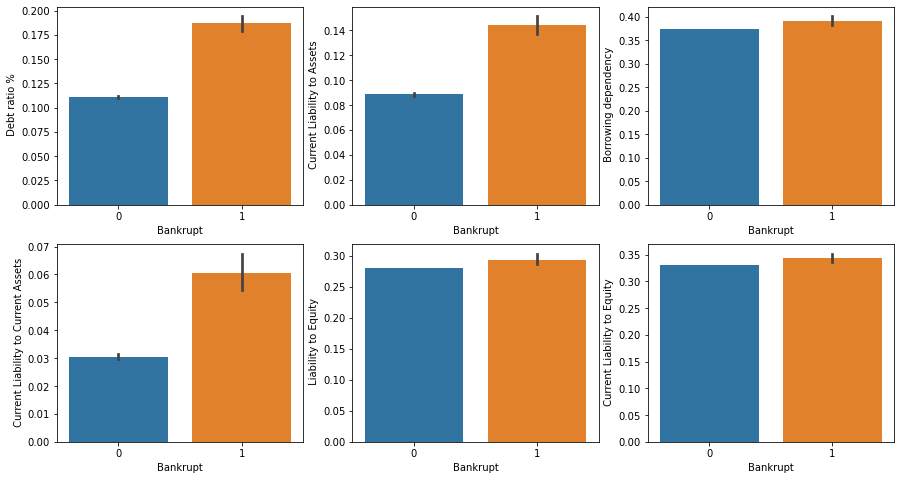

In [119]:
x_value = positive_corr.columns.tolist()[-1]
y_value = positive_corr.columns.tolist()[:-1]

corrbargraph(x_value, y_value)

We see that three attributes - "Debt Ratio %, Current Liability To Assets, Current Liability To Current Assets" are commonly high in bankrupt organizations.

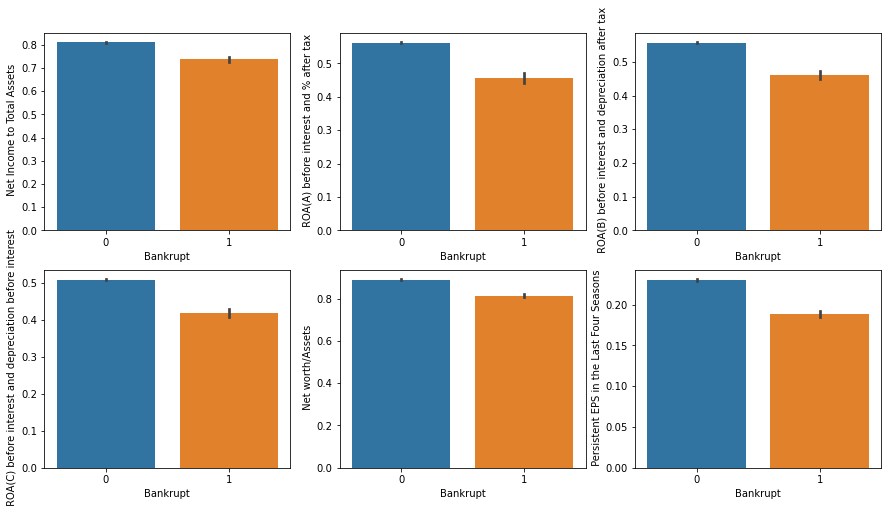

In [120]:
x_value = negative_corr.columns.tolist()[-1]
y_value = negative_corr.columns.tolist()[:-1]

corrbargraph(x_value, y_value)



These attributes show us that the more the assets and earing of a company, the less likely is the organization to be bankrupt. 

<AxesSubplot:>

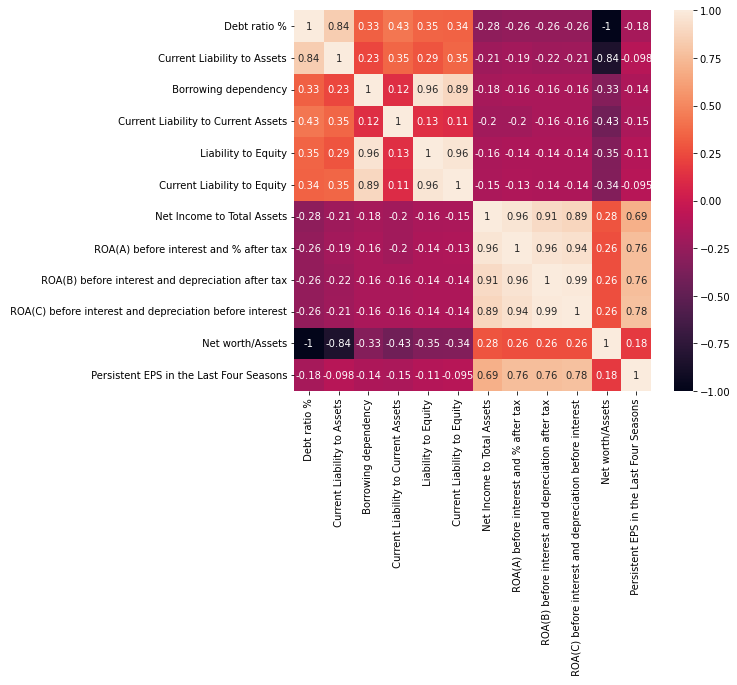

In [121]:
relation = positive_corr.columns.tolist()[:-1] + negative_corr.columns.tolist()[:-1]
plt.figure(figsize=(8,7))
sns.heatmap(df[relation].corr(),annot=True)



Summary of Analysis

1.Several companies possess many assets, which is always a good sign for an organization.
2.An organization cannot guarantee not being bankrupt, although owning several assets.
3.It is observed that “Debt Ratio %, Current Liability To Assets, Current Liability To Current Assets" attributes are a few of the attributes that have a high correlation with the target attribute.
4.An increase in the values of the attributes “Debt Ratio %, Current Liability To Assets, Current Liability To Current Assets” causes an organization to suffer heavy losses, thus resulting in bankruptcy.
5.An increase in the values of the attributes that have a negative correlation with the target attribute helps an organization avoid bankruptcy.

In [122]:
#defining dependent and independent variables
x = df.drop('Bankrupt', axis=1)
y = df['Bankrupt']

In [123]:
#splitting data into training and testing set

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 101)

In [124]:
over_sampler = RandomOverSampler(random_state=101)
x_train_over , y_train_over = over_sampler.fit_resample(x_train , y_train)

In [125]:
y_train.value_counts()

0    5280
1     175
Name: Bankrupt, dtype: int64

In [126]:
y_train_over.value_counts()

0    5280
1    5280
Name: Bankrupt, dtype: int64

In [127]:
#training model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter = 10000)
lr.fit(x_train_over,y_train_over)

#getting confusion matrix
from sklearn.metrics import confusion_matrix,classification_report
y_pred = lr.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
print('confusion matrix:\n',cm)

#checking accuracy
from sklearn.metrics import accuracy_score
lra = accuracy_score(y_test,y_pred)
print('accuracy score = ',lra)
print("Classification Report",classification_report(y_test,y_pred))

confusion matrix:
 [[991 328]
 [ 24  21]]
accuracy score =  0.7419354838709677
Classification Report               precision    recall  f1-score   support

           0       0.98      0.75      0.85      1319
           1       0.06      0.47      0.11        45

    accuracy                           0.74      1364
   macro avg       0.52      0.61      0.48      1364
weighted avg       0.95      0.74      0.82      1364



In [128]:
#training model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski',p = 2)
knn.fit(x_train_over,y_train_over)

#getting confusion matrix
from sklearn.metrics import confusion_matrix,classification_report
y_pred = knn.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
print('confusion matrix:\n',cm)

#checking accuracy
from sklearn.metrics import accuracy_score
knna = accuracy_score(y_test,y_pred)
print('accuracy score = ',accuracy_score(y_test,y_pred))
print("Classification Report",classification_report(y_test,y_pred))

confusion matrix:
 [[1217  102]
 [  38    7]]
accuracy score =  0.8973607038123167
Classification Report               precision    recall  f1-score   support

           0       0.97      0.92      0.95      1319
           1       0.06      0.16      0.09        45

    accuracy                           0.90      1364
   macro avg       0.52      0.54      0.52      1364
weighted avg       0.94      0.90      0.92      1364



In [129]:
#training model
from sklearn.svm import SVC
svc = SVC(kernel = 'rbf')
svc.fit(x_train_over,y_train_over)

#getting confusion matrix
from sklearn.metrics import confusion_matrix,classification_report
y_pred = svc.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
print('confusion matrix:\n',cm)

#checking accuracy
from sklearn.metrics import accuracy_score
sva2 = accuracy_score(y_test,y_pred)
print('accuracy score = ',accuracy_score(y_test,y_pred))
print("Classification Report",classification_report(y_test,y_pred))

confusion matrix:
 [[970 349]
 [ 23  22]]
accuracy score =  0.7272727272727273
Classification Report               precision    recall  f1-score   support

           0       0.98      0.74      0.84      1319
           1       0.06      0.49      0.11        45

    accuracy                           0.73      1364
   macro avg       0.52      0.61      0.47      1364
weighted avg       0.95      0.73      0.81      1364



In [130]:
#training model
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train_over,y_train_over)

#getting confusion matrix
from sklearn.metrics import confusion_matrix,classification_report
y_pred = nb.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
print('confusion matrix:\n',cm)

#checking accuracy
from sklearn.metrics import accuracy_score
nba = accuracy_score(y_test,y_pred)
print('accuracy score = ',accuracy_score(y_test,y_pred))
print("Classification Report",classification_report(y_test,y_pred))

confusion matrix:
 [[  52 1267]
 [   4   41]]
accuracy score =  0.06818181818181818
Classification Report               precision    recall  f1-score   support

           0       0.93      0.04      0.08      1319
           1       0.03      0.91      0.06        45

    accuracy                           0.07      1364
   macro avg       0.48      0.48      0.07      1364
weighted avg       0.90      0.07      0.08      1364



In [131]:
#training model
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'entropy')
dt.fit(x_train_over,y_train_over)

#getting confusion matrix
from sklearn.metrics import confusion_matrix,classification_report
y_pred = dt.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
print('confusion matrix:\n',cm)

#checking accuracy
from sklearn.metrics import accuracy_score
dta = accuracy_score(y_test,y_pred)
print('accuracy score = ',accuracy_score(y_test,y_pred))
print("Classification Report",classification_report(y_test,y_pred))

confusion matrix:
 [[1299   20]
 [  32   13]]
accuracy score =  0.9618768328445748
Classification Report               precision    recall  f1-score   support

           0       0.98      0.98      0.98      1319
           1       0.39      0.29      0.33        45

    accuracy                           0.96      1364
   macro avg       0.68      0.64      0.66      1364
weighted avg       0.96      0.96      0.96      1364



In [132]:
#training model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 60, criterion = 'entropy',random_state = 0)
rf.fit(x_train_over,y_train_over)

#getting confusion matrix
from sklearn.metrics import confusion_matrix,classification_report
y_pred = rf.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
print('confusion matrix:\n',cm)

#checking accuracy
from sklearn.metrics import accuracy_score
rfa = accuracy_score(y_test,y_pred)
print('accuracy score = ',accuracy_score(y_test,y_pred))
print("Classification Report",classification_report(y_test,y_pred))

confusion matrix:
 [[1311    8]
 [  38    7]]
accuracy score =  0.966275659824047
Classification Report               precision    recall  f1-score   support

           0       0.97      0.99      0.98      1319
           1       0.47      0.16      0.23        45

    accuracy                           0.97      1364
   macro avg       0.72      0.57      0.61      1364
weighted avg       0.96      0.97      0.96      1364



In [140]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train_over,y_train_over)

#getting confusion matrix
from sklearn.metrics import confusion_matrix,classification_report
y_pred = xgb.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
print('confusion matrix:\n',cm)

#checking accuracy
from sklearn.metrics import accuracy_score
xgba = accuracy_score(y_test,y_pred)
print('accuracy score = ',accuracy_score(y_test,y_pred))
print("Classification Report",classification_report(y_test,y_pred))

confusion matrix:
 [[1314    5]
 [  31   14]]
accuracy score =  0.9736070381231672
Classification Report               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1319
           1       0.74      0.31      0.44        45

    accuracy                           0.97      1364
   macro avg       0.86      0.65      0.71      1364
weighted avg       0.97      0.97      0.97      1364



Text(0.5, 1.0, 'Plotting the Model Accuracies')

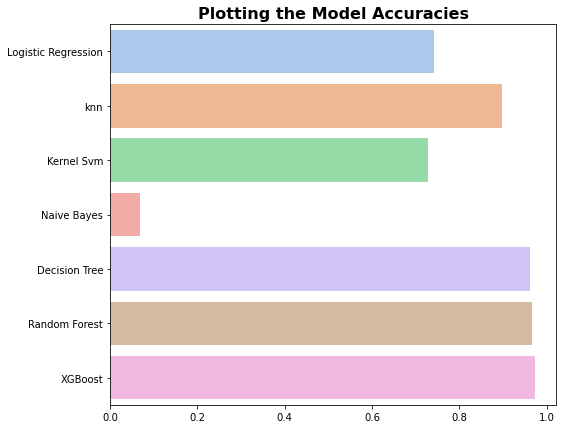

In [134]:
#comparing accuracies
plt.figure(figsize= (8,7))
ac = [lra,knna,sva2,nba,dta,rfa,xgba]
name = ['Logistic Regression','knn','Kernel Svm','Naive Bayes','Decision Tree', 'Random Forest','XGBoost']
sns.barplot(x = ac,y = name,palette='pastel')
plt.title("Plotting the Model Accuracies", fontsize=16, fontweight="bold")

In [135]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
x_train_pca = pca.fit_transform(x_train_over)
x_test_pca = pca.transform(x_test)

In [136]:
x_train_pca.shape,x_test_pca.shape

((10560, 2), (1364, 2))

In [137]:
#training model
from sklearn.ensemble import RandomForestClassifier
rf_pca = RandomForestClassifier(n_estimators = 60, criterion = 'entropy',random_state = 0)
rf_pca.fit(x_train_pca,y_train_over)

#getting confusion matrix
from sklearn.metrics import confusion_matrix,classification_report
y_pred = rf_pca.predict(x_test_pca)
cm_pca= confusion_matrix(y_test,y_pred)
print('confusion matrix:\n',cm)

#checking accuracy
from sklearn.metrics import accuracy_score
rfa_pca = accuracy_score(y_test,y_pred)
print('accuracy score = ',accuracy_score(y_test,y_pred))
print("Classification Report",classification_report(y_test,y_pred))

confusion matrix:
 [[1314    5]
 [  31   14]]
accuracy score =  0.9611436950146628
Classification Report               precision    recall  f1-score   support

           0       0.97      0.99      0.98      1319
           1       0.00      0.00      0.00        45

    accuracy                           0.96      1364
   macro avg       0.48      0.50      0.49      1364
weighted avg       0.93      0.96      0.95      1364



In [138]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = rf_pca, X = x_train_pca, y = y_train_over, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))



Accuracy: 99.25 %
Standard Deviation: 0.26 %


<AxesSubplot:>

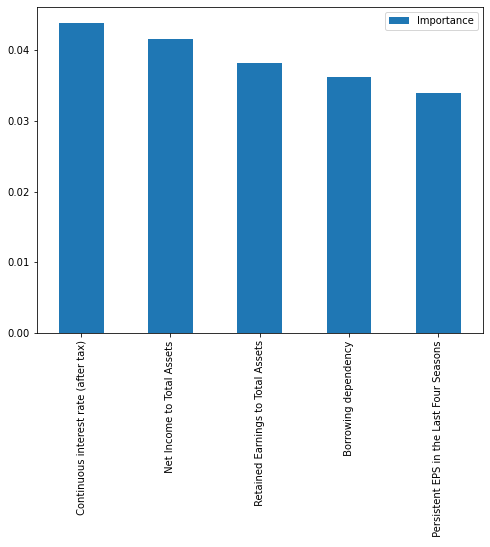

In [139]:
feat_importances = pd.DataFrame(rf.feature_importances_, index=x_train_over.columns, columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
imp=feat_importances.head(5)
#feat_importances.plot(kind='bar', figsize=(8,6))
imp.plot(kind='bar', figsize=(8,6))


